<a href="https://colab.research.google.com/github/rajatraiii/rajatraiii/blob/main/Housing_price%20eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving eda.csv to eda.csv
User uploaded file "eda.csv" with length 54773 bytes


In [4]:
df_data=pd.read_csv("eda.csv")

In [5]:
df_data.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [7]:
df_data.dtypes

price          float64
crime_rate     float64
resid_area     float64
air_qual       float64
room_num       float64
age            float64
dist1          float64
dist2          float64
dist3          float64
dist4          float64
teachers       float64
poor_prop      float64
airport         object
n_hos_beds     float64
n_hot_rooms    float64
waterbody       object
rainfall         int64
bus_ter         object
parks          float64
dtype: object

In [9]:
df_data.columns

Index(['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'dist1', 'dist2', 'dist3', 'dist4', 'teachers', 'poor_prop', 'airport',
       'n_hos_beds', 'n_hot_rooms', 'waterbody', 'rainfall', 'bus_ter',
       'parks'],
      dtype='object')

In [11]:
df_data.isnull().any()

price          False
crime_rate     False
resid_area     False
air_qual       False
room_num       False
age            False
dist1          False
dist2          False
dist3          False
dist4          False
teachers       False
poor_prop      False
airport        False
n_hos_beds      True
n_hot_rooms    False
waterbody      False
rainfall       False
bus_ter        False
parks          False
dtype: bool

In [12]:
df_data.isna().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

In [15]:
df_data.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


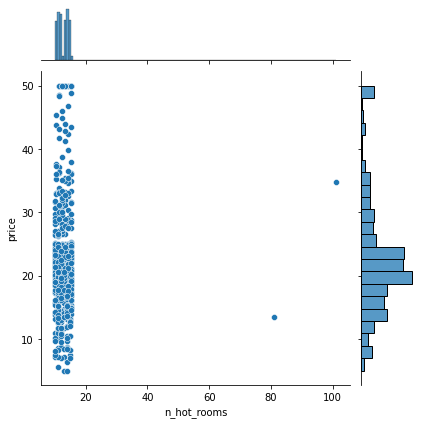

In [14]:
sns.jointplot(x="n_hot_rooms",y="price",data=df_data)

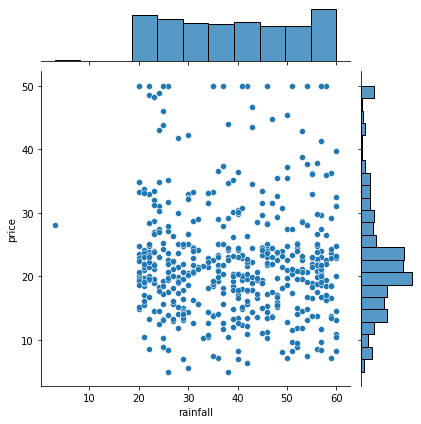

In [17]:
sns.jointplot(x="rainfall",y="price",data=df_data)

In [18]:
df_data.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


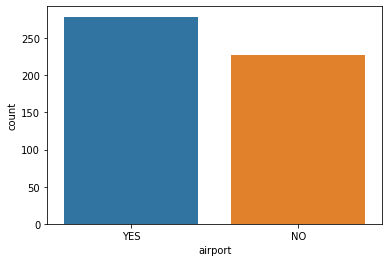

In [19]:
sns.countplot(x="airport",data=df_data)

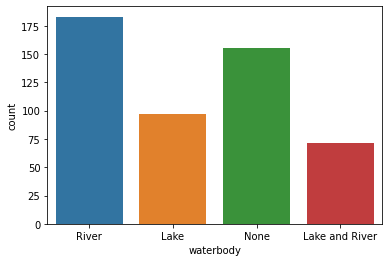

In [20]:
sns.countplot(x="waterbody",data=df_data)

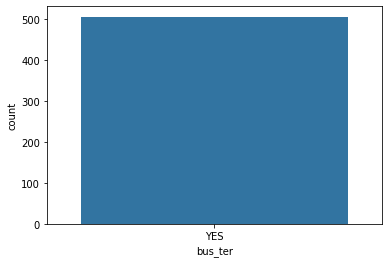

In [21]:
sns.countplot(x="bus_ter",data=df_data)

In [24]:
np.percentile(df_data.n_hot_rooms,[99])[0]

15.39952

In [26]:
uv=np.percentile(df_data.n_hot_rooms,[99])[0]

In [28]:
df_data[(df_data.n_hot_rooms)>uv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [29]:
df_data.n_hot_rooms[(df_data.n_hot_rooms)>3*uv]=3*uv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
np.percentile(df_data.rainfall,[1])[0]

20.0

In [33]:
lv=np.percentile(df_data.rainfall,[1])[0]

In [37]:
df_data[(df_data.rainfall<lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6,6.0,6.0


In [36]:
df_data[(df_data.rainfall<0.3*lv)]= 0.3*lv

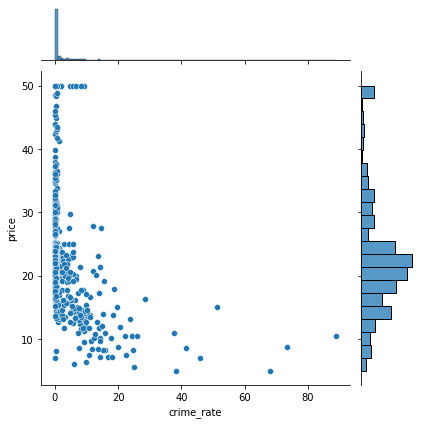

In [39]:
sns.jointplot(x="crime_rate" ,y="price", data=df_data)

In [40]:
df_data.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.485178,3.625104,41.068419,0.565586,6.283893,68.522925,3.975731,3.632885,3.964269,3.623775,21.514032,12.646383,7.896631,12.855700,39.187747,0.066225
std,9.208147,8.600804,7.035901,0.268358,0.702719,28.240108,2.110450,2.111175,2.121714,2.101869,2.272553,7.145709,1.479058,2.703509,12.497221,0.264524
min,5.000000,0.006320,6.000000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,6.000000,1.730000,5.268000,6.000000,6.000000,0.033292
25%,16.850000,0.082045,35.145000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.922500,6.628000,11.189800,28.000000,0.046487
50%,21.200000,0.260420,39.690000,0.538000,6.205000,77.500000,3.385000,3.010000,3.375000,3.070000,20.900000,11.360000,7.999000,12.720000,39.000000,0.053548
75%,25.000000,3.689388,48.100000,0.624000,6.623500,94.075000,5.400000,5.000000,5.417500,5.005000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061453
max,50.000000,88.976200,57.740000,6.000000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,6.000000


In [41]:
df_data.n_hos_beds=df_data.n_hos_beds.fillna(df_data.n_hos_beds.mean())

In [42]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [43]:
df_data.crime_rate=np.log(1+df_data.crime_rate)

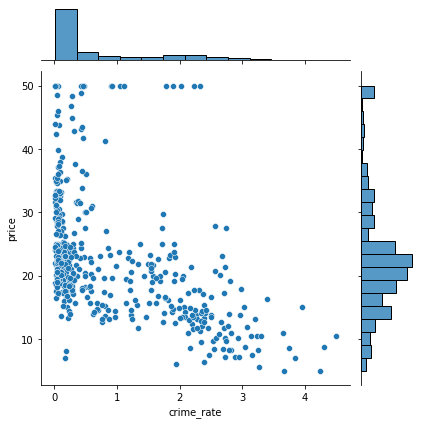

In [44]:
sns.jointplot(x="crime_rate",y="price", data=df_data)

In [45]:
df_data['avg_dist']=(df_data.dist1+df_data.dist2+df_data.dist3+df_data.dist4)/4

In [47]:
df_data.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.485178,0.817004,41.068419,0.565586,6.283893,68.522925,3.975731,3.632885,3.964269,3.623775,21.514032,12.646383,7.896631,12.855700,39.187747,0.066225,3.799165
std,9.208147,1.023516,7.035901,0.268358,0.702719,28.240108,2.110450,2.111175,2.121714,2.101869,2.272553,7.145709,1.467296,2.703509,12.497221,0.264524,2.108129
min,5.000000,0.006300,6.000000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,6.000000,1.730000,5.268000,6.000000,6.000000,0.033292,1.127500
25%,16.850000,0.078853,35.145000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.922500,6.641500,11.189800,28.000000,0.046487,2.100625
50%,21.200000,0.231444,39.690000,0.538000,6.205000,77.500000,3.385000,3.010000,3.375000,3.070000,20.900000,11.360000,7.963000,12.720000,39.000000,0.053548,3.207500
75%,25.000000,1.545301,48.100000,0.624000,6.623500,94.075000,5.400000,5.000000,5.417500,5.005000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061453,5.213750
max,50.000000,4.499545,57.740000,6.000000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,6.000000,12.127500


In [49]:
del df_data["dist1"]

In [50]:
del df_data["dist2"]

In [51]:
del df_data["dist3"]

In [52]:
del df_data["dist4"]

In [53]:
del df_data["bus_ter"]

In [54]:
df_data.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.485178,0.817004,41.068419,0.565586,6.283893,68.522925,21.514032,12.646383,7.896631,12.855700,39.187747,0.066225,3.799165
std,9.208147,1.023516,7.035901,0.268358,0.702719,28.240108,2.272553,7.145709,1.467296,2.703509,12.497221,0.264524,2.108129
min,5.000000,0.006300,6.000000,0.385000,3.561000,2.900000,6.000000,1.730000,5.268000,6.000000,6.000000,0.033292,1.127500
25%,16.850000,0.078853,35.145000,0.449000,5.885500,45.025000,19.800000,6.922500,6.641500,11.189800,28.000000,0.046487,2.100625
50%,21.200000,0.231444,39.690000,0.538000,6.205000,77.500000,20.900000,11.360000,7.963000,12.720000,39.000000,0.053548,3.207500
75%,25.000000,1.545301,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061453,5.213750
max,50.000000,4.499545,57.740000,6.000000,8.780000,100.000000,27.400000,37.970000,10.876000,46.198560,60.000000,6.000000,12.127500


for categorical values we use dummy variable

In [55]:
df_data=pd.get_dummies(df_data)

In [57]:
df_data.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,...,parks,avg_dist,airport_6.0,airport_NO,airport_YES,waterbody_6.0,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,...,0.049347,4.0875,0,0,1,0,0,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,...,0.046146,4.9675,0,1,0,0,1,0,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,...,0.045764,4.9675,0,1,0,0,0,0,1,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,...,0.047151,6.0650,0,0,1,0,1,0,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,...,0.039474,6.0625,0,1,0,0,1,0,0,0


In [58]:
del df_data["airport_NO"]

In [59]:
del df_data["waterbody_None"]

In [60]:
df_data.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_6.0,airport_YES,waterbody_6.0,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,0,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,0,1,0,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,0,0,1,0,0


In [61]:
df_data.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_6.0,airport_YES,waterbody_6.0,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.467973,-0.453529,-0.256490,0.695520,-0.366309,0.504678,-0.734412,0.113278,0.027046,-0.034446,-0.095328,0.244524,-0.079745,0.185115,-0.079745,0.038443,-0.035473,0.075123
crime_rate,-0.467973,1.000000,0.632305,0.349297,-0.289235,0.550812,-0.386321,0.605467,-0.007220,0.049379,0.072766,0.074701,-0.582911,0.049130,-0.135552,0.049130,-0.027079,0.007652,-0.062693
resid_area,-0.453529,0.632305,1.000000,0.121218,-0.377833,0.648356,-0.288490,0.597479,0.018389,0.021280,0.080305,-0.194107,-0.699926,-0.222014,-0.101429,-0.222014,-0.021190,0.054289,-0.089186
air_qual,-0.256490,0.349297,0.121218,1.000000,-0.146637,0.225250,-0.352044,0.217383,-0.073417,-0.099255,-0.068285,0.917177,-0.289825,0.902034,-0.075785,0.902034,-0.039817,-0.010433,-0.046889
room_num,0.695520,-0.289235,-0.377833,-0.146637,1.000000,-0.237351,0.344107,-0.612457,0.033056,0.016783,-0.061902,-0.029337,0.204135,-0.017995,0.164338,-0.017995,-0.003681,0.010979,0.047039
age,-0.366309,0.550812,0.648356,0.225250,-0.237351,1.000000,-0.218501,0.602920,-0.015827,0.022449,0.079340,-0.071641,-0.749091,-0.098618,0.012224,-0.098618,0.004338,-0.003596,-0.086936
teachers,0.504678,-0.386321,-0.288490,-0.352044,0.344107,-0.218501,1.000000,-0.343561,0.009814,-0.000838,-0.008118,-0.311005,0.207075,-0.304085,0.081178,-0.304085,0.052939,-0.039340,0.099884
poor_prop,-0.734412,0.605467,0.597479,0.217383,-0.612457,0.602920,-0.343561,1.000000,-0.063698,0.020724,0.063892,-0.019248,-0.497971,-0.041431,-0.092099,-0.041431,0.003651,0.020985,-0.108228
n_hos_beds,0.113278,-0.007220,0.018389,-0.073417,0.033056,-0.015827,0.009814,-0.063698,1.000000,0.002953,0.064121,-0.060409,-0.030428,-0.057577,-0.003126,-0.057577,0.043220,0.060251,-0.072462
n_hot_rooms,0.027046,0.049379,0.021280,-0.099255,0.016783,0.022449,-0.000838,0.020724,0.002953,1.000000,0.023006,-0.111991,-0.025680,-0.112956,-0.047720,-0.112956,0.039223,0.015924,-0.061420


Text(0.5, 1.0, 'pearson corr')

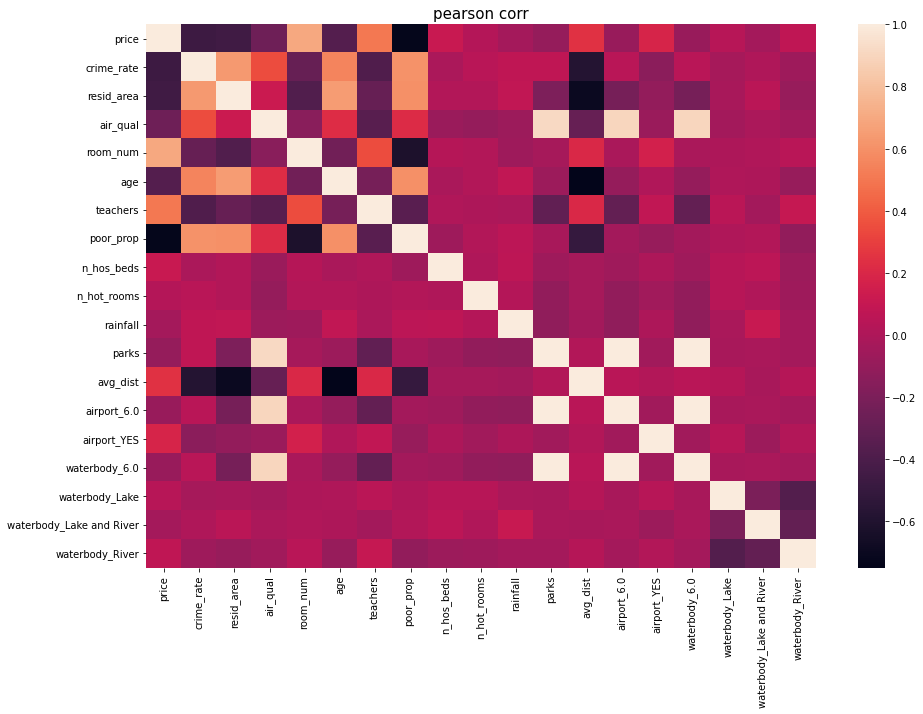

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(df_data.corr(method="pearson"))
plt.title("pearson corr",fontsize=15)

Text(0.5, 1.0, 'spearman corr')

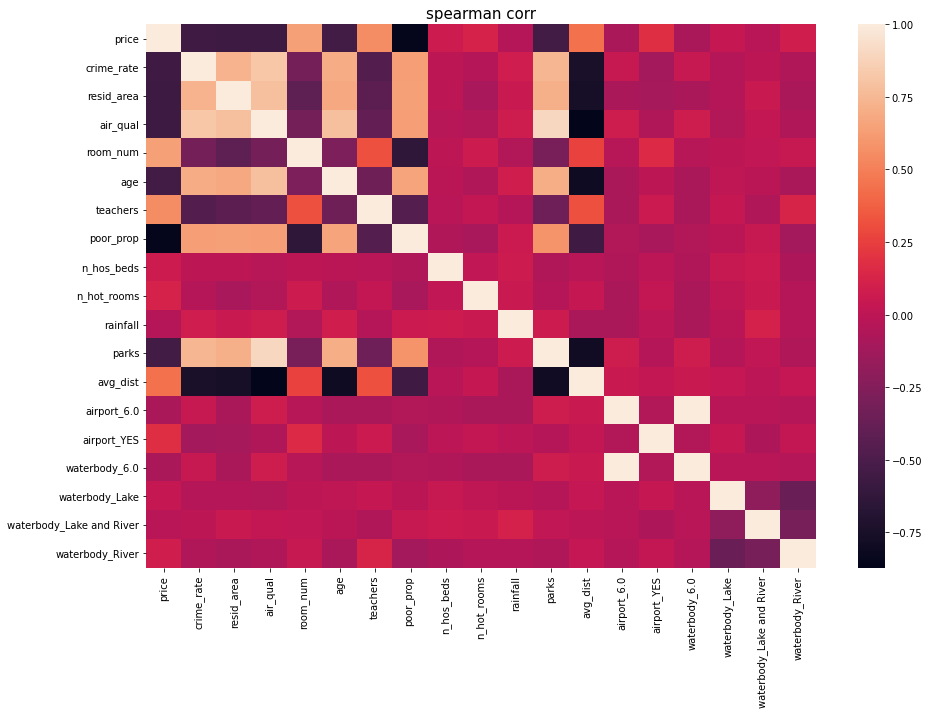

In [75]:
plt.figure(figsize=(15,10))
sns.heatmap(df_data.corr(method="spearman"))
plt.title("spearman corr",fontsize=15)

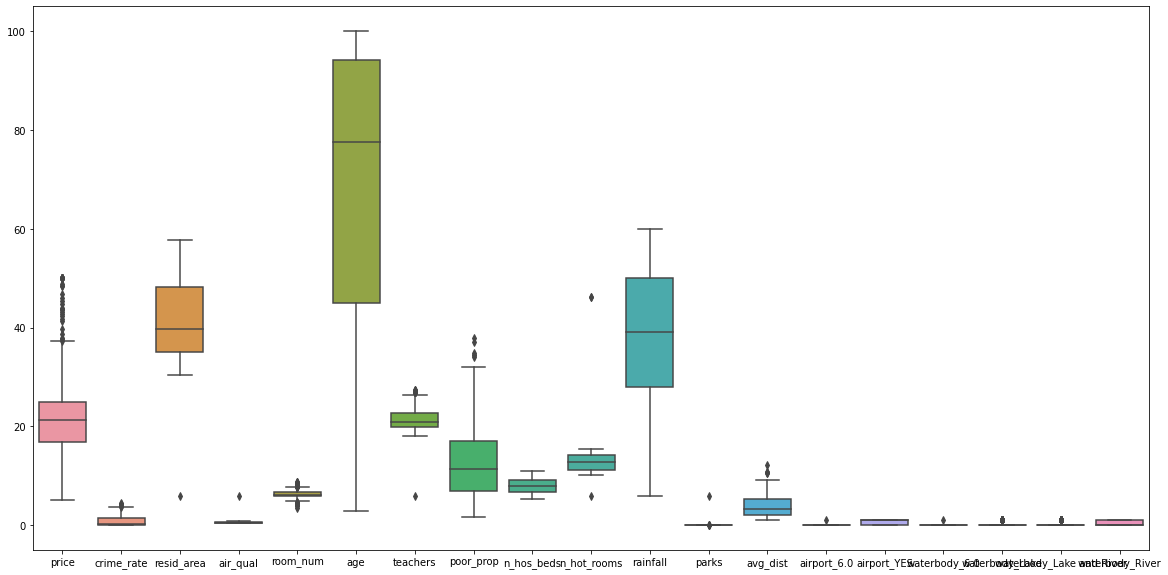

In [68]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_data)